# <center> Gold Price Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data=pd.read_csv('/content/gold_price.csv')

## Task 1: Initial Data Exploration

In [3]:
gold_data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [4]:
gold_data.tail()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
4713,2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88
4714,2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43
4715,2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03
4716,2019-08-30,1526.55,1528.40,1253.14,1251.15,1382.75,1383.51
4717,2019-09-02,1523.35,1525.95,1260.42,1265.01,1388.69,1391.51


In [5]:
gold_data.shape

(4718, 7)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


In [7]:
gold_data.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [8]:
gold_data.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [9]:
correlation = gold_data.corr()

In [10]:
plt.figure (figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

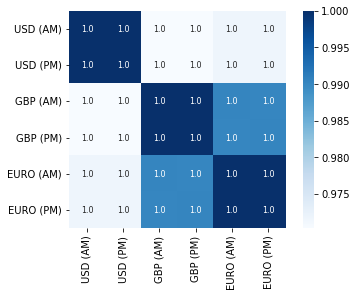

In [11]:
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [12]:
print (correlation['USD (AM)'])

USD (AM)     1.000000
USD (PM)     0.999892
GBP (AM)     0.970433
GBP (PM)     0.970336
EURO (AM)    0.971767
EURO (PM)    0.971688
Name: USD (AM), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


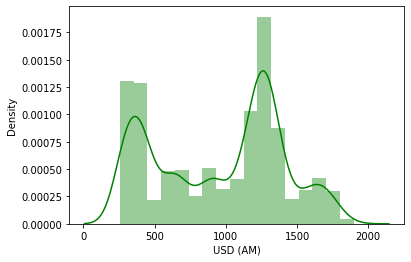

In [13]:
sns.distplot(gold_data['USD (AM)'],color='green')

#**Data Preproccessing**

In [14]:
X = gold_data.drop(['Date','USD (AM)'],axis=1)
Y = gold_data['USD (AM)']

In [29]:
X.isnull().sum()

USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [32]:
# Removing null values from dataset
X['USD (PM)'] = X['USD (PM)'].replace(np.NaN, X['USD (PM)'].mean())
X['GBP (PM)'] = X['GBP (AM)'].replace(np.NaN, X['GBP (AM)'].mean())
X['EURO (PM)'] = X['EURO (PM)'].replace(np.NaN, X['EURO (PM)'].mean())

In [34]:
Y.isnull().sum()

0

## Task 2: Create Train & Test Sets

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.4, random_state=2)

In [36]:
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Task 3: Develop Models & Predictions

In [38]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[1200.576  1261.1785 1224.6905 ...  364.6695 1241.83    318.293 ]


In [40]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9982608609196774


Compare the Actual Values and Predicted Values in a Plot

In [41]:
Y_test = list(Y_test)

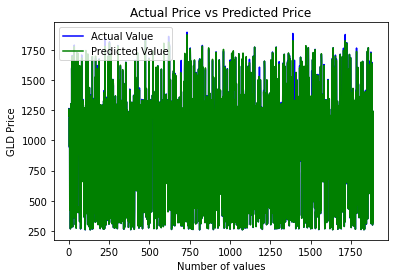

In [43]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()